### Analysis of Highly Rated Papers Discussing LLMs Limitations
In this analysis, we investigate the trends of highly rated academic papers that discuss the limitations of large language models (LLMs). The data spans from 2022 to 2024 and is analyzed on a quarterly basis. The goal is to understand the fraction of high-quality papers that comprehensively address LLMs limitations compared to the total number of papers that mention at least one limitation.

Normalization:

By using fractions (fraction_talk_about_limitations and fraction_high_rating), the code ensures that the comparison between different conferences is fair and not biased by the absolute number of papers.

##### Initial analysis regarding the midterm presentation 

C:\Users\User\AppData\Local\Temp/ipykernel_22132/983372704.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('Source').apply(calculate_metrics).reset_index()


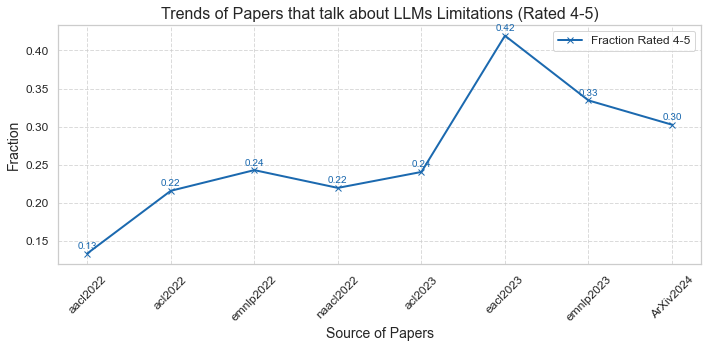

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('results_time_series.csv')
df.columns = df.columns.str.strip()
df['Source'] = df['Source'].str.strip()
df['Talks about LLMs'] = df['Talks about LLMs'].str.strip().str.replace(r'\.$', '', regex=True).fillna('No')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce').fillna(0).astype(int)
def calculate_metrics(group):
    total_papers = group.shape[0]
    talk_about_limitations = group['Talks about LLMs'].eq('Yes').sum()
    high_rating_papers = group.loc[group['Rate'] >= 4, 'Talks about LLMs'].eq('Yes').sum()
    
    return pd.Series({
        'total_papers': total_papers,
        'talk_about_limitations': talk_about_limitations,
        'high_rating_papers': high_rating_papers
    })
summary = df.groupby('Source').apply(calculate_metrics).reset_index()
summary['fraction_talk_about_limitations'] = summary['talk_about_limitations'] / summary['total_papers']
summary['fraction_high_rating'] = summary['high_rating_papers'] / summary['total_papers']
summary['Year'] = summary['Source'].str.extract(r'(\d{4})').astype(int)
summary = summary.sort_values(by=['Year', 'Source'])
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
highlight_color = sns.color_palette("Blues", 8)[6]
plt.plot(summary['Source'].values, summary['fraction_high_rating'].values, marker='x', label='Fraction Rated 4-5', color=highlight_color, linewidth=2)
for i, row in summary.iterrows():
    plt.annotate(f'{row["fraction_high_rating"]:.2f}', 
                 (row['Source'], row['fraction_high_rating']), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center', 
                 fontsize=10, 
                 color=highlight_color)
plt.title('Trends of Papers that talk about LLMs Limitations (Rated 4-5)', fontsize=16)
plt.xlabel('Source of Papers', fontsize=14)
plt.ylabel('Fraction', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Analysis of ACL Papers 
This code processes and visualizes data from a CSV file to display the trends of papers discussing limitations of Large Language Models (LLMs) rated 4-5 by quarter. It involves loading and preprocessing the dataset, mapping months to quarters, filtering data, counting papers, calculating fractions, and visualizing the results with a scatter plot.

Unique Years in Dataset: [2022 2023 2024]
Entries for 2024 before any processing:
         Source                                              Title  \
717  naacl2024  Named Entity Recognition Under Domain Shift vi...   
718  naacl2024  Assessing Logical Puzzle Solving in Large Lang...   
719  naacl2024  On Linearizing Structured Data in Encoder-Deco...   
720  naacl2024  Measuring and Improving Chain-of-Thought Reaso...   
721  naacl2024  Adaptive Rank Selections for Low-Rank Approxim...   
..         ...                                                ...   
951  naacl2024  HybridBERT - Making BERT Pretraining More Effi...   
952  naacl2024    Catch Me If You GPT: Tutorial on Deepfake Texts   
953  naacl2024  Combating Security and Privacy Issues in the E...   
954  naacl2024    Explanation in the Era of Large Language Models   
955  naacl2024            Human-AI Interaction in the Age of LLMs   

    Talks about LLMs  Rate                                           Evidence  \
717    

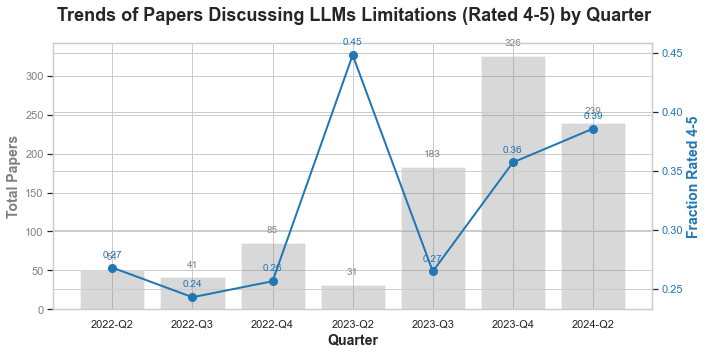

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_acl.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Talks about LLMs'] = df['Talks about LLMs'].str.strip().str.replace(r'\.$', '', regex=True).fillna('No')
df = df.dropna(subset=['Year', 'Month'])
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce').fillna(0).astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
df['Month'] = df['Month'].str.strip()
unique_years = df['Year'].unique()
print("Unique Years in Dataset:", unique_years)
entries_2024_before = df[df['Year'] == 2024]
print("Entries for 2024 before any processing:\n", entries_2024_before)
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df = df.dropna(subset=['Quarter'])
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
print("Dataset after mapping months to quarters:\n", df[df['Year'] == 2024])
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
filtered_2024 = df_filtered[df_filtered['Year'] == 2024]
print("Filtered Data for 2024:\n", filtered_2024)
print("Raw data around 2024:")
print(df[(df['Year'] >= 2023) & (df['Year'] <= 2024)].sort_values(by='Year'))
total_papers = {}
talk_about_limitations = {}
high_rating_papers = {}
for _, row in df_filtered.iterrows():
    year_quarter = row['Year-Quarter']
    if year_quarter not in total_papers:
        total_papers[year_quarter] = 0
        talk_about_limitations[year_quarter] = 0
        high_rating_papers[year_quarter] = 0
    
    total_papers[year_quarter] += 1
    
    if row['Talks about LLMs'] == 'Yes':
        talk_about_limitations[year_quarter] += 1
        if row['Rate'] >= 4:
            high_rating_papers[year_quarter] += 1
quarters_to_include = ['2024-Q2'] 
summary = pd.DataFrame({
    'Year-Quarter': total_papers.keys(),
    'total_papers': total_papers.values(),
    'talk_about_limitations': talk_about_limitations.values(),
    'high_rating_papers': high_rating_papers.values()
})
summary = summary[~summary['Year-Quarter'].isin(['2024-Q1', '2024-Q3', '2024-Q4'])]
summary_split = summary['Year-Quarter'].str.split('-', expand=True)
summary['Year'] = pd.to_numeric(summary_split[0], errors='coerce').astype(int)
summary['Quarter'] = summary_split[1]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
summary['fraction_talk_about_limitations'] = summary['talk_about_limitations'] / summary['total_papers']
summary['fraction_high_rating'] = summary['high_rating_papers'] / summary['talk_about_limitations']
summary[['fraction_talk_about_limitations', 'fraction_high_rating']] = summary[['fraction_talk_about_limitations', 'fraction_high_rating']].fillna(0)
print("Summary After Processing:\n", summary)
print("Entries for 2024 in Summary DataFrame:\n", summary[summary['Year'] == 2024])

year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
total_papers_np = summary['total_papers'].to_numpy()
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:gray'
ax1.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Papers', fontsize=14, fontweight='bold', color=color)
ax1.bar(year_quarter_np, total_papers_np, color=color, alpha=0.3, label='Total Papers')
ax1.tick_params(axis='y', labelcolor=color)
for i, (x, y) in enumerate(zip(year_quarter_np, total_papers_np)):
    ax1.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color=color)
ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold', color=color)
ax2.plot(year_quarter_np, fraction_high_rating_np, marker='o', linestyle='-', color=color, linewidth=2, markersize=8, label='Fraction Rated 4-5')
ax2.tick_params(axis='y', labelcolor=color)
for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color=color)

fig.tight_layout() 
fig.suptitle('Trends of Papers Discussing LLMs Limitations (Rated 4-5) by Quarter', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()


##### Second option showing only the trend scatter line 

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Unique Years in Dataset: [2022 2023 2024]
Entries for 2024 before any processing:
         Source                                              Title  \
717  naacl2024  Named Entity Recognition Under Domain Shift vi...   
718  naacl2024  Assessing Logical Puzzle Solving in Large Lang...   
719  naacl2024  On Linearizing Structured Data in Encoder-Deco...   
720  naacl2024  Measuring and Improving Chain-of-Thought Reaso...   
721  naacl2024  Adaptive Rank Selections for Low-Rank Approxim...   
..         ...                                                ...   
951  naacl2024  HybridBERT - Making BERT Pretraining More Effi...   
952  naacl2024    Catch Me If You GPT: Tutorial on Deepfake Texts   
953  naacl2024  Combating Security and Privacy Issues in the E...   
954  naacl2024    Explanation in the Era of Large Language Models   
955  naacl2024            Human-AI Interaction in the Age of LLMs   

    Talks about LLMs  Rate                                           Evidence  \
717    

Summary After Processing:
   Year-Quarter  total_papers  talk_about_limitations  high_rating_papers  \
1      2022-Q2            51                      41                  11   
2      2022-Q3            41                      37                   9   
0      2022-Q4            85                      74                  19   
4      2023-Q2            31                      29                  13   
3      2023-Q3           183                     166                  44   
5      2023-Q4           326                     305                 109   
6      2024-Q2           239                     228                  88   

   Year Quarter  fraction_talk_about_limitations  fraction_high_rating  
1  2022      Q2                         0.803922              0.268293  
2  2022      Q3                         0.902439              0.243243  
0  2022      Q4                         0.870588              0.256757  
4  2023      Q2                         0.935484              0.448276  

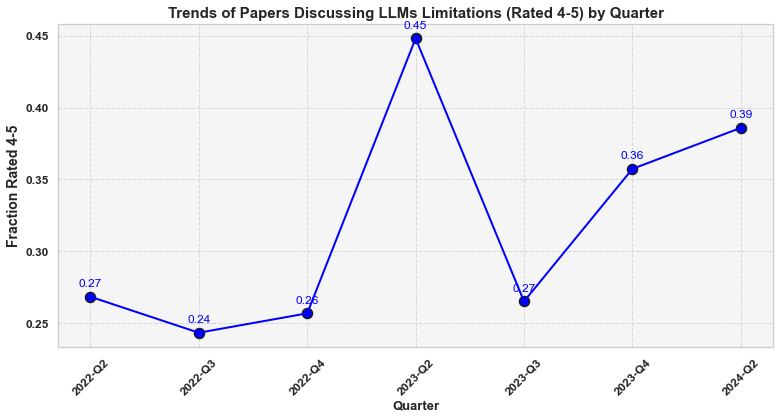

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_acl.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Talks about LLMs'] = df['Talks about LLMs'].str.strip().str.replace(r'\.$', '', regex=True).fillna('No')
df = df.dropna(subset=['Year', 'Month'])
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce').fillna(0).astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)

df['Month'] = df['Month'].str.strip()

unique_years = df['Year'].unique()
print("Unique Years in Dataset:", unique_years)
entries_2024_before = df[df['Year'] == 2024]
print("Entries for 2024 before any processing:\n", entries_2024_before)
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df = df.dropna(subset=['Quarter'])
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
print("Dataset after mapping months to quarters:\n", df[df['Year'] == 2024])
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
filtered_2024 = df_filtered[df_filtered['Year'] == 2024]
print("Filtered Data for 2024:\n", filtered_2024)
print("Raw data around 2024:")
print(df[(df['Year'] >= 2023) & (df['Year'] <= 2024)].sort_values(by='Year'))
total_papers = {}
talk_about_limitations = {}
high_rating_papers = {}
for _, row in df_filtered.iterrows():
    year_quarter = row['Year-Quarter']
    if year_quarter not in total_papers:
        total_papers[year_quarter] = 0
        talk_about_limitations[year_quarter] = 0
        high_rating_papers[year_quarter] = 0
    
    total_papers[year_quarter] += 1
    
    if row['Talks about LLMs'] == 'Yes':
        talk_about_limitations[year_quarter] += 1
        if row['Rate'] >= 4:
            high_rating_papers[year_quarter] += 1
quarters_to_include = ['2024-Q2'] 
summary = pd.DataFrame({
    'Year-Quarter': total_papers.keys(),
    'total_papers': total_papers.values(),
    'talk_about_limitations': talk_about_limitations.values(),
    'high_rating_papers': high_rating_papers.values()
})
summary = summary[~summary['Year-Quarter'].isin(['2024-Q1', '2024-Q3', '2024-Q4'])]
summary_split = summary['Year-Quarter'].str.split('-', expand=True)
summary['Year'] = pd.to_numeric(summary_split[0], errors='coerce').astype(int)
summary['Quarter'] = summary_split[1]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
summary['fraction_talk_about_limitations'] = summary['talk_about_limitations'] / summary['total_papers']
summary['fraction_high_rating'] = summary['high_rating_papers'] / summary['talk_about_limitations']
summary[['fraction_talk_about_limitations', 'fraction_high_rating']] = summary[['fraction_talk_about_limitations', 'fraction_high_rating']].fillna(0)
print("Summary After Processing:\n", summary)
print("Entries for 2024 in Summary DataFrame:\n", summary[summary['Year'] == 2024])

year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
plt.figure(figsize=(11, 6))
sns.set(style="whitegrid")
plt.scatter(year_quarter_np, fraction_high_rating_np, color='blue', s=100, edgecolor='k', linewidth=1.5)
plt.plot(year_quarter_np, fraction_high_rating_np, color='blue', linestyle='-', linewidth=2)
for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='blue')
plt.title('Trends of Papers Discussing LLMs Limitations (Rated 4-5) by Quarter', fontsize=15, fontweight='bold')
plt.xlabel('Quarter', fontsize=13, fontweight='bold')
plt.ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()


This code processes and visualizes data from a CSV file to display the trends of papers discussing limitations of Large Language Models (LLMs) rated 4-5 by quarter. It creates separate scatter plots for each year (2022, 2023, and 2024) with unique colors, displaying them next to each other for easy comparison.

#### Analysis of ArXiv Papers 

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


First few rows of the dataset:
      Source                                              Title  \
0  arXIv2022  GitHub Copilot AI pair programmer: Asset or Li...   
1  arXIv2022  Compressing Pre-trained Transformers via Low-B...   
2  arXIv2022  Solving Quantitative Reasoning Problems with L...   
3  arXIv2022  Knowledge Distillation of Transformer-based La...   
4  arXIv2022  Bottleneck Low-rank Transformers for Low-resou...   

  Talks about LLMs  Rate                                           Evidence  \
0              No.   1.0  The abstract discusses GitHub Copilot, an AI p...   
1             Yes.   3.0  "the huge size of these models brings signific...   
2             Yes.   3.0  "state-of-the-art models have generally strugg...   
3             Yes.   5.0  "However, the large model size and high run-ti...   
4             Yes.   3.0  "The resulting models are too large for on-edg...   

   Year                  Date  
0  2022  2022-06-30T15:00:03Z  
1  2022  2022-06-30T04:33:5

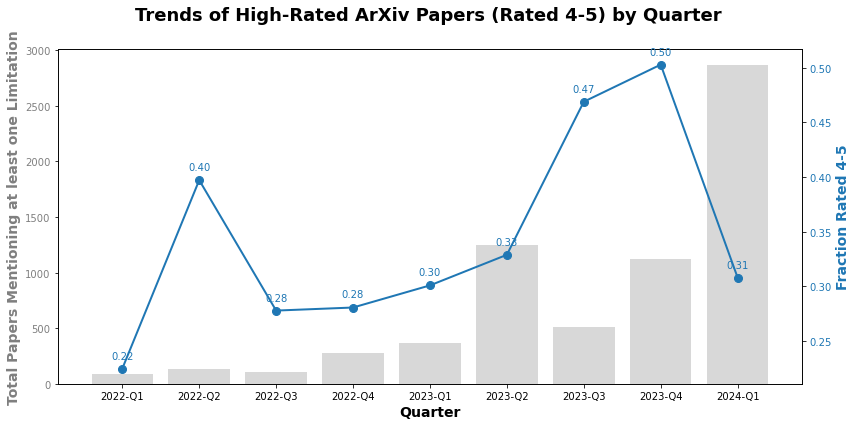

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_arXiv.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
print("First few rows of the dataset:")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']

print("First few rows after preprocessing:")
print(df.head())
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = df_filtered.groupby('Year-Quarter').size().reset_index(name='total_papers')
high_rated_papers = df_filtered[df_filtered['Rate'] >= 4].groupby('Year-Quarter').size().reset_index(name='high_rated_papers')
summary = pd.merge(total_papers, high_rated_papers, on='Year-Quarter', how='left')
summary['high_rated_papers'] = summary['high_rated_papers'].fillna(0).astype(int)
summary['fraction_high_rating'] = summary['high_rated_papers'] / summary['total_papers']
summary['Year'] = summary['Year-Quarter'].str[:4].astype(int)
summary['Quarter'] = summary['Year-Quarter'].str[-2:]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
print("Summary of total and high-rated papers by quarter:")
print(summary)
year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
total_papers_np = summary['total_papers'].to_numpy()
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:gray'
ax1.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Papers Mentioning at least one Limitation', fontsize=14, fontweight='bold', color=color)
ax1.bar(year_quarter_np, total_papers_np, color=color, alpha=0.3, label='Total Papers')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold', color=color)
ax2.plot(year_quarter_np, fraction_high_rating_np, marker='o', linestyle='-', color=color, linewidth=2, markersize=8, label='Fraction Rated 4-5')
ax2.tick_params(axis='y', labelcolor=color)
for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color=color)

fig.tight_layout()
fig.suptitle('Trends of High-Rated ArXiv Papers (Rated 4-5) by Quarter', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()


First few rows of the dataset:
      Source                                              Title  \
0  arXIv2022  GitHub Copilot AI pair programmer: Asset or Li...   
1  arXIv2022  Compressing Pre-trained Transformers via Low-B...   
2  arXIv2022  Solving Quantitative Reasoning Problems with L...   
3  arXIv2022  Knowledge Distillation of Transformer-based La...   
4  arXIv2022  Bottleneck Low-rank Transformers for Low-resou...   

  Talks about LLMs  Rate                                           Evidence  \
0              No.   1.0  The abstract discusses GitHub Copilot, an AI p...   
1             Yes.   3.0  "the huge size of these models brings signific...   
2             Yes.   3.0  "state-of-the-art models have generally strugg...   
3             Yes.   5.0  "However, the large model size and high run-ti...   
4             Yes.   3.0  "The resulting models are too large for on-edg...   

   Year                  Date  
0  2022  2022-06-30T15:00:03Z  
1  2022  2022-06-30T04:33:5

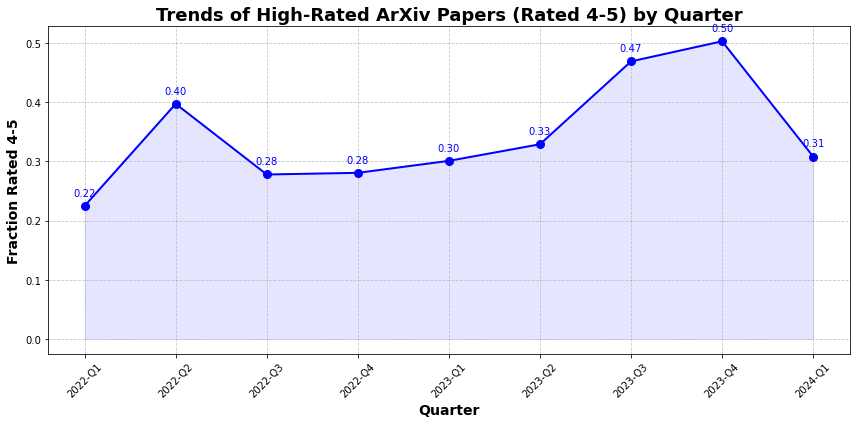

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_arXiv.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
print("First few rows of the dataset:")
print(df.head())

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
print("First few rows after preprocessing:")
print(df.head())

df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = df_filtered.groupby('Year-Quarter').size().reset_index(name='total_papers')
high_rated_papers = df_filtered[df_filtered['Rate'] >= 4].groupby('Year-Quarter').size().reset_index(name='high_rated_papers')
summary = pd.merge(total_papers, high_rated_papers, on='Year-Quarter', how='left')
summary['high_rated_papers'] = summary['high_rated_papers'].fillna(0).astype(int)
summary['fraction_high_rating'] = summary['high_rated_papers'] / summary['total_papers']
summary['Year'] = summary['Year-Quarter'].str[:4].astype(int)
summary['Quarter'] = summary['Year-Quarter'].str[-2:]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
print("Summary of total and high-rated papers by quarter:")
print(summary)
year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
plt.figure(figsize=(12, 6))
plt.plot(year_quarter_np, fraction_high_rating_np, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Fraction Rated 4-5')
plt.fill_between(year_quarter_np, fraction_high_rating_np, color='blue', alpha=0.1)

plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold')
plt.title('Trends of High-Rated ArXiv Papers (Rated 4-5) by Quarter', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='blue')
plt.tight_layout()
plt.show()


#### Bubble Graph Representation
Bubble Size: Represents a third variable, which could be the number of papers or another quantitative measure. Larger bubbles indicate higher values.

First few rows of the dataset:
      Source                                              Title  \
0  arXIv2022  GitHub Copilot AI pair programmer: Asset or Li...   
1  arXIv2022  Compressing Pre-trained Transformers via Low-B...   
2  arXIv2022  Solving Quantitative Reasoning Problems with L...   
3  arXIv2022  Knowledge Distillation of Transformer-based La...   
4  arXIv2022  Bottleneck Low-rank Transformers for Low-resou...   

  Talks about LLMs  Rate                                           Evidence  \
0              No.   1.0  The abstract discusses GitHub Copilot, an AI p...   
1             Yes.   3.0  "the huge size of these models brings signific...   
2             Yes.   3.0  "state-of-the-art models have generally strugg...   
3             Yes.   5.0  "However, the large model size and high run-ti...   
4             Yes.   3.0  "The resulting models are too large for on-edg...   

   Year                  Date  
0  2022  2022-06-30T15:00:03Z  
1  2022  2022-06-30T04:33:5

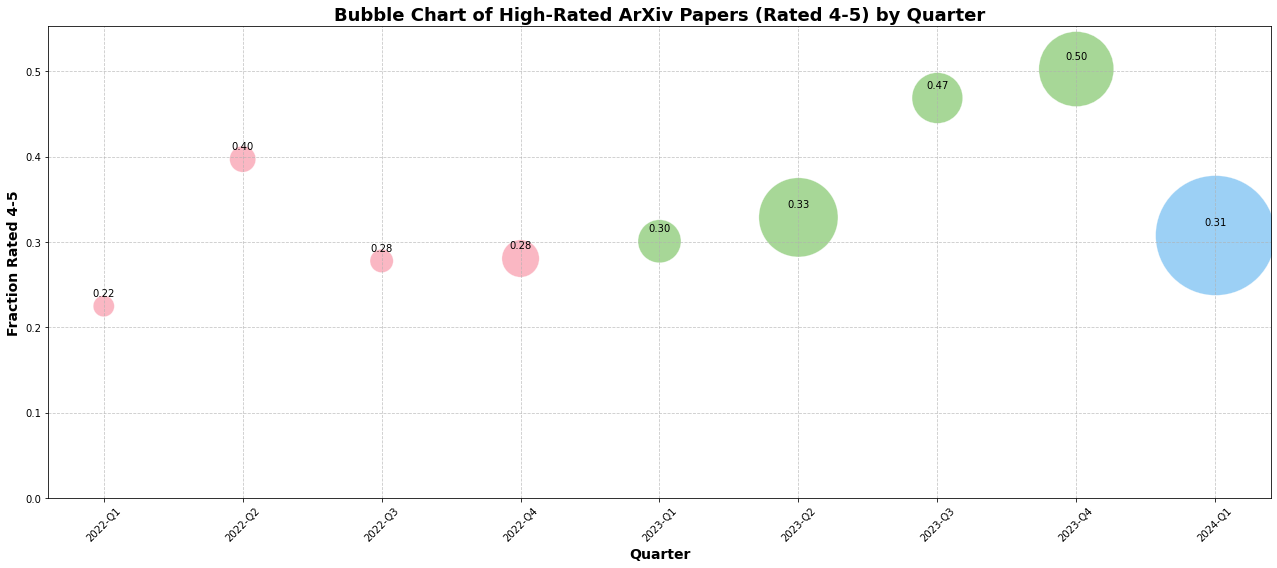

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_arXiv.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
print("First few rows of the dataset:")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
print("First few rows after preprocessing:")
print(df.head())
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = df_filtered.groupby('Year-Quarter').size().reset_index(name='total_papers')
high_rated_papers = df_filtered[df_filtered['Rate'] >= 4].groupby('Year-Quarter').size().reset_index(name='high_rated_papers')

summary = pd.merge(total_papers, high_rated_papers, on='Year-Quarter', how='left')
summary['high_rated_papers'] = summary['high_rated_papers'].fillna(0).astype(int)
summary['fraction_high_rating'] = summary['high_rated_papers'] / summary['total_papers']
summary['Year'] = summary['Year-Quarter'].str[:4].astype(int)
summary['Quarter'] = summary['Year-Quarter'].str[-2:]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
print("Summary of total and high-rated papers by quarter:")
print(summary)

palette = sns.color_palette("husl", len(summary['Year'].unique()))
color_map = {year: palette[i] for i, year in enumerate(summary['Year'].unique())}
plt.figure(figsize=(21, 8))
for year in summary['Year'].unique():
    year_data = summary[summary['Year'] == year]
    plt.scatter(year_data['Year-Quarter'], year_data['fraction_high_rating'], 
                s=year_data['total_papers']*5, alpha=0.5, color=color_map[year], edgecolors='w', linewidth=0.5, label=year)

plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold')
plt.title('Bubble Chart of High-Rated ArXiv Papers (Rated 4-5) by Quarter', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, summary['fraction_high_rating'].max() + 0.05)
for i in range(len(summary)):
    plt.annotate(f'{summary["fraction_high_rating"].iloc[i]:.2f}', 
                 (summary['Year-Quarter'].iloc[i], summary['fraction_high_rating'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='black')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
